<a href="https://colab.research.google.com/github/Anirill/MADE_test/blob/master/MADE_ML_1_rem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
import csv

FILENAME = "out.csv"


datasetX = pd.read_csv('train.csv', header = None)
datasetY = pd.read_csv('train-target.csv', header = None)
datasetXt = pd.read_csv('test.csv', header = None)
datasetX = datasetX.drop(columns= 0, axis = 1)
#datasetX = datasetX.drop(columns= 2, axis = 1)
datasetX = datasetX.drop(columns= 5, axis = 1)
datasetX = datasetX.drop(columns= 9, axis = 1)
datasetX = datasetX.drop(columns= 10, axis = 1)
datasetX = datasetX.drop(columns= 15, axis = 1)
datasetX = datasetX.drop(columns= 16, axis = 1)
datasetX = datasetX.drop(columns= 17, axis = 1)
datasetX = datasetX.drop(columns= 22, axis = 1)
datasetX = datasetX.drop(columns= 26, axis = 1)
datasetX = datasetX.drop(columns= 19, axis = 1)

datasetXt = datasetXt.drop(columns= 0, axis = 1)
#datasetXt = datasetXt.drop(columns= 2, axis = 1)
datasetXt = datasetXt.drop(columns= 5, axis = 1)
datasetXt = datasetXt.drop(columns= 9, axis = 1)
datasetXt = datasetXt.drop(columns= 10, axis = 1)
datasetXt = datasetXt.drop(columns= 15, axis = 1)
datasetXt = datasetXt.drop(columns= 16, axis = 1)
datasetXt = datasetXt.drop(columns= 17, axis = 1)
datasetXt = datasetXt.drop(columns= 22, axis = 1)
datasetXt = datasetXt.drop(columns= 26, axis = 1)
datasetXt = datasetXt.drop(columns= 19, axis = 1)

X = datasetX.iloc[:, :].values
y = datasetY.iloc[:, :].values
Xt = datasetXt.iloc[:, :].values
#X.drop(['17', '22'])
#del X['22']


from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers = None, remainder = 'passthrough')
X = np.array(X)
#print(len(X[:, 9:10]))
#for i in range(len(X[:, 9:10])):
#    X[i:i+1, 9:10] = math.log(X[i:i+1, 9:10])
Xt = np.array(Xt)
#for i in range(len(Xt[:, 9:10])):
#    Xt[i:i+1, 9:10] = math.log(Xt[i:i+1, 9:10])

#Xt[:, 9:10] = math.log(Xt[:, 9:10])

#y = np.array(y)

from pandas.plotting import scatter_matrix

#X = (X - X.mean()) / X.std()
#Xt = (Xt - Xt.mean()) / X.std()

print(datasetX.head())
print(X[:5, 0:10])
#print(X)

           1           2           3   ...          27          28         29
0  -70.197440  119.035181   20.711737  ...   40.680890  -37.942655  33.838225
1   -8.305435 -117.828269  -28.588333  ...  -32.101939  -52.255449  -4.826111
2  133.463504 -105.511797 -149.110267  ... -117.205053 -107.835928 -93.990332
3   11.850181 -299.969407   29.371721  ...  -25.218215  121.674228 -16.877368
4  -85.166292  -73.363391  -35.357907  ... -132.875142    3.492953 -15.799596

[5 rows x 20 columns]
[[-7.01974401e+01  1.19035181e+02  2.07117370e+01 -6.15298581e+00
  -2.32309033e+01 -1.66521871e+02 -4.15714627e+01  2.69531303e+00
   4.45292724e+01  1.29986657e+01]
 [-8.30543475e+00 -1.17828269e+02 -2.85883329e+01  1.42232401e+01
  -4.55386641e+01  5.88989762e+01  2.77497442e+01 -4.89923282e+00
  -1.04382283e+02  2.86726116e+00]
 [ 1.33463504e+02 -1.05511797e+02 -1.49110267e+02 -3.67335511e+00
   5.81539503e+00  1.00838385e+02 -4.62402112e+01 -3.13431558e+00
  -1.45510845e+02  8.69723729e+01]
 [ 1.185

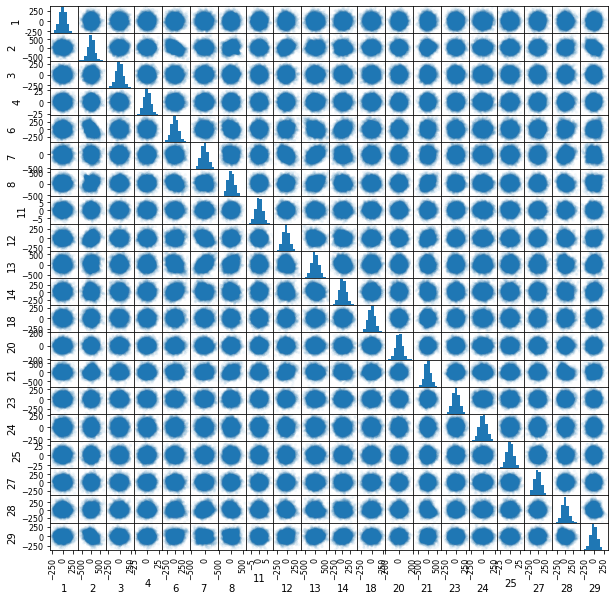

In [ ]:
scatter_matrix(datasetX, alpha=0.05, figsize=(10, 10));

In [ ]:
from sklearn.model_selection import train_test_split as train
X_train, X_test, y_train, y_test = train(X, y, test_size=0.01, random_state = 1) #23
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
#Xa = sc.fit_transform(X)
#Xta = sc.transform(Xt)
#X_train = sc.transform(X_train)
#X_test = sc.transform(X_test)
#print(X[0:5, 0:5])
#print(y_train[0:5])
#print(Xt[0:5, 0:5])



In [ ]:
from sklearn.neighbors import KNeighborsClassifier
scores = []
bs = 0 
cs = 0
for i in range(1, 120):
  clf = KNeighborsClassifier(n_neighbors=i, algorithm = 'auto', n_jobs=-1) #33
  clf.fit(X_train, y_train.ravel())
  cs = clf.score(X_test, y_test)
  scores.append(cs)
  if(bs < cs):
      print(i)
      bs = cs
      print(bs)
  elif (i % 10 == 0):
      print(i)
print(clf.score(X_test, y_test))

1
0.67
2
0.69
3
0.71
4
0.77
10
20
23
0.78
30
34
0.79
40
50
60
70
80
90
100
110
0.73


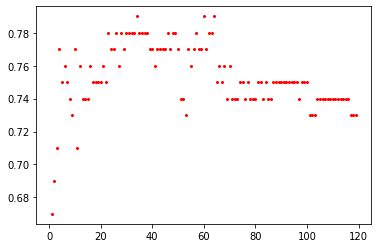

In [ ]:
fig = plt.figure()
xx = range(1, len(scores)+1)
ax1 = fig.add_subplot(111)
ax1.scatter(xx, scores, s=4, c='r')

#ax1.scatter(x[40:],y[40:], s=10, c='r', marker="o", label='second')
#plt.legend(loc='upper left');
plt.show()

In [ ]:
clf = KNeighborsClassifier(n_neighbors=100, algorithm = 'auto', n_jobs=-1) #33
clf.fit(X_train, y_train.ravel())
print(clf.score(X_test, y_test))


#clf.fit(X, y.ravel())

0.728


In [ ]:
clf = KNeighborsClassifier(n_neighbors=25, algorithm = 'auto', n_jobs=-1) #25 -- 97 (rem 17, 22) noscale
#Xa = sc.fit_transform(X)
#Xta = sc.transform(Xt)
clf.fit(X, y.ravel())


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=25, p=2,
                     weights='uniform')

In [ ]:
#Xta = sc.transform(Xt)
#y_test = clf.predict(Xt)
#print(y_test[0:5])
out = clf.predict_proba(Xt)
#print(out)

In [ ]:
with open(FILENAME, "w", newline="") as file:
    writer = csv.writer(file)
    writer.writerows(out[:, 1:2])